In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import make_circles

# Cria 1000 exemplos
n_samples = 1000

# Criando os círculos
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

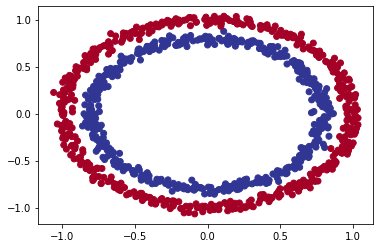

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
# Seed aleatório
tf.random.set_seed(42)

# 1. Cria o modelo usando a API Sequential
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compila o modelo
# escolhemos BinaryCrossentropy(), já que o problema envolve 2 classes (0 e 1)
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Treina o modelo
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Treinando o modelo por mais tempo
# (resulta em mais chances de analisar os dados)
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
# Seed aleatório
tf.random.set_seed(42)

# 1. Mesmo modelo que model_1, dessa vez com uma camada extra
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # camada extra
  tf.keras.layers.Dense(1) 
])

# 2. Compila o modelo
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Treina o modelo
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [14]:
# Seed aleatório
tf.random.set_seed(42)

# 1. Criação do modelo (dessa vez com 3 camadas)
model_3 = tf.keras.Sequential([
  # 1 camada com 100 neuronios
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10), # outra camada com 10 neuronios
  tf.keras.layers.Dense(1)
])

# 2. Compila o modelo
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # Adam em vez de SGD
                metrics=['accuracy'])

# 3. Treina o modelo
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

In [16]:
import numpy as np

def plot_decision(model, X, y):
  
  # Define os limites dos eixos do gráfico
  # e cria uma "tabela", grade de malha
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Adiciona os valores de X (que vamos prever)
  x_in = np.c_[xx.ravel(), yy.ravel()]
  
  # Faz previsões utilizando o modelo treinado
  y_pred = model.predict(x_in)

  # Verifica se o problema é multiclasse
  if len(y_pred[0]) > 1:
    print("aplicando classificação multiclasse...")
    # Faz um "reshape" nas previsões para a plotagem
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("aplicando classificação binária...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Limite de decisão de plotagem
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

aplicando classificação multiclasse...


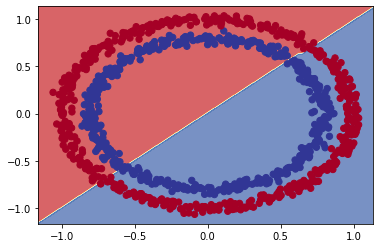

In [17]:
plot_decision(model_3, X, y)

In [18]:
# Seed aleatório
tf.random.set_seed(42)

# Cria o modelo
model_4 = tf.keras.Sequential([
  # camada oculta com ativação "linear"
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(1) # camada de saída
])

# Compila o modelo
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Treina
history = model_4.fit(X, y, epochs=100, verbose=0)

In [19]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.4860


[0.7177660465240479, 0.4860000014305115]

aplicando classificação binária...


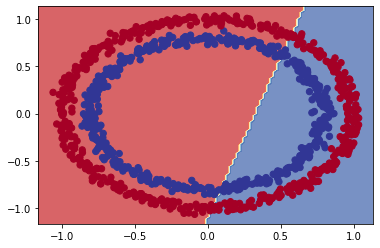

In [20]:
plot_decision(model_4, X, y)

In [21]:
# Seed
tf.random.set_seed(42)

# Criando modelo com ativação não linear
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1) # saída
])

# Compilando
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history = model_5.fit(X, y, epochs=100, verbose=0)

In [22]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931846141815186, 0.5]

In [23]:
# Seed
tf.random.set_seed(42)

# Criando o modelo
model_6 = tf.keras.Sequential([
  # camada 1, 4 neurônios, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  # camada 2, 4 neurônios, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1) # camada de saída
])

# Compila
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit
history = model_6.fit(X, y, epochs=100, verbose=0)

In [24]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

aplicando classificação binária...


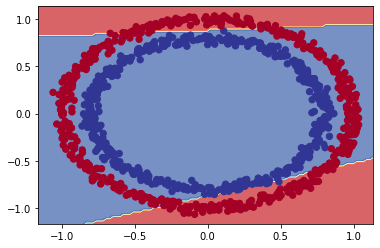

In [25]:
plot_decision(model_6, X, y)

In [26]:
# Seed
tf.random.set_seed(42)

# Criando o modelo
model_7 = tf.keras.Sequential([
  # camada 1, 4 neurônios, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  # camada 2, 4 neurônios, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  # camada de saída, sigmoid activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compila
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit
history = model_7.fit(X, y, epochs=100, verbose=0)

In [27]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

aplicando classificação binária...


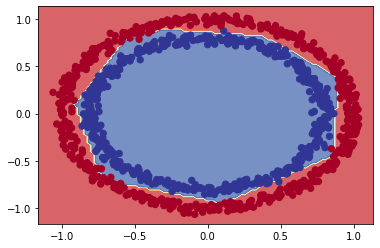

In [28]:
plot_decision(model_7, X, y)

In [29]:
# Separando os dados em conjuntos de treino e teste
X_train, y_train = X[:800], y[:800] # 80% para treino
X_test, y_test = X[800:], y[800:] # 20% para teste

# Agora temos 800 exemplos de treino e 200 de teste
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [30]:
# Seed
tf.random.set_seed(42)

# Criando o modelo
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compila
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                # aumentando a taxa de aprendizado de 0.001 para 0.01
                # isso faz o modelo aprender mais rápido
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit
history = model_8.fit(X_train, y_train, epochs=25, verbose=0)

In [31]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Perda no conjunto de teste: {loss}")
print(f"Precisão no conjunto de teste: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Perda no conjunto de teste: 0.12468849867582321
Precisão no conjunto de teste: 100.00%


aplicando classificação binária...
aplicando classificação binária...


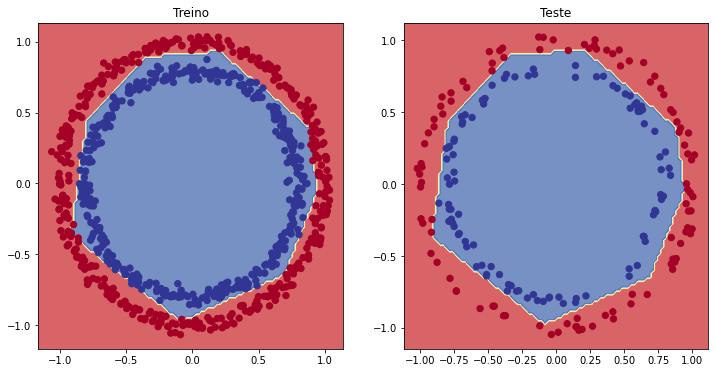

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Treino")
plot_decision(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Teste")
plot_decision(model_8, X=X_test, y=y_test)
plt.show()

In [33]:
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500


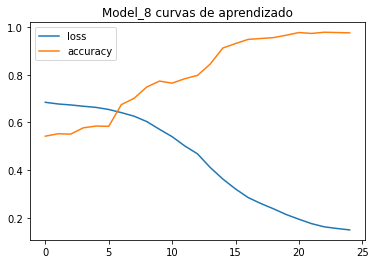

In [34]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 curvas de aprendizado");

In [35]:
# Seed
tf.random.set_seed(42)

# Criando o modelo (igual ao último model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compilando
model_9.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"]) 

# Criando um callback para "learning_rate"
# o objetivo aqui é percorrer um conjunto de valores de taxa de aprendizado
# começando em 1e-4 e aumentando para 10**(epoch/20) "para cada epoch"
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit (agora passando o callback que foi criado)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      verbose=0,
                      callbacks=[lr_scheduler])

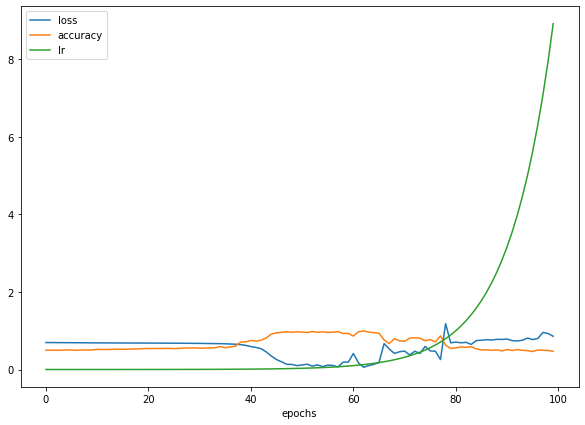

In [36]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

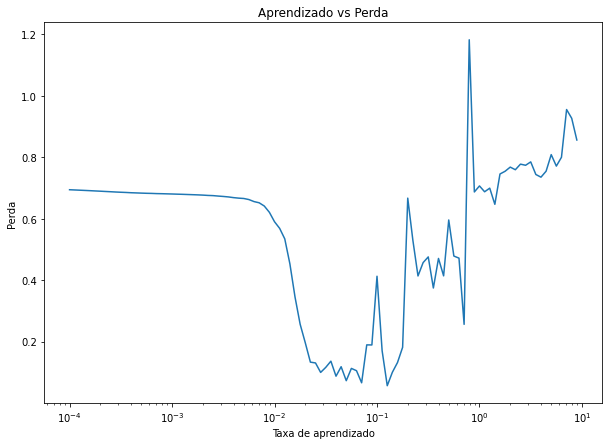

In [37]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Taxa de aprendizado")
plt.ylabel("Perda")
plt.title("Aprendizado vs Perda");

In [38]:
# Sed
tf.random.set_seed(42)

# Criando o modelo
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compilando o modelo, dessa vez com a taxa ideal
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# Fit
history = model_10.fit(X_train, y_train, epochs=20, verbose=0)

In [39]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

aplicando classificação binária...
aplicando classificação binária...


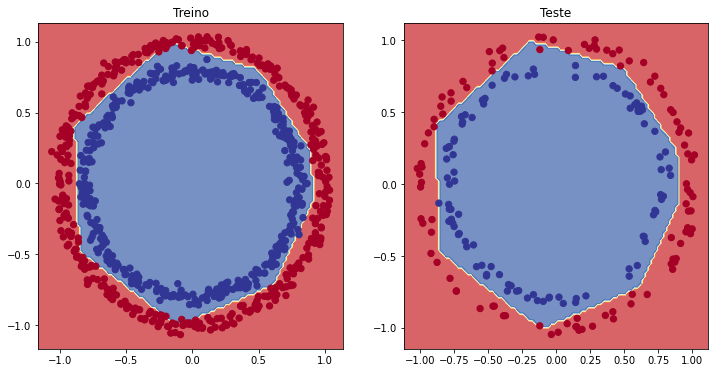

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Treino")
plot_decision(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Teste")
plot_decision(model_10, X=X_test, y=y_test)
plt.show();